In [70]:
import sys
!{sys.executable} -m pip install imbalanced-learn
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install pickle5
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install seaborn
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error
from openpyxl import Workbook
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error

In [81]:
# Datos de entrenamiento
df_train = pd.read_excel("DATA_ENTRENAMIENTO.xlsx")

# Datos de prueba
df_test = pd.read_excel("DATA_PRUEBA.xlsx")

In [82]:
X_train = df_train.drop(['ID','Nombre','GENERO','TRABAJO','APROBADO','CASHBACK'], axis=1)
X_traincash = df_train[['LINEACREDITO']]
y_train_aprob = df_train['APROBADO']
y_train_cashback = df_train['CASHBACK']
X_test = df_test.drop(['ID','Nombre','GENERO','TRABAJO','APROBADO','CASHBACK'], axis=1)
X_testcash = df_test[['LINEACREDITO']]
y_test_aprob = df_test['APROBADO']
y_test_cashback = df_test['CASHBACK']

In [83]:
columnas_con_na = df_train.isna().sum()
print(columnas_con_na)

ID                 0
Nombre             0
GENERO             0
CARRO              0
PROPIOCARRO        0
CANTHIJOS          0
INGRESOTOTAL       0
EDUCACION          0
STATUSFAMILIAR     0
TIPOCASA           0
TELEFONOTRABAJO    0
EMAIL              0
TRABAJO            0
DEUDA              0
ANTIGÜEDAD         0
COMPRAS            0
LINEACREDITO       0
CASHBACK           0
APROBADO           0
dtype: int64


In [84]:
columnas_con_na = df_test.isna().sum()
print(columnas_con_na)

ID                 0
Nombre             0
GENERO             0
CARRO              0
PROPIOCARRO        0
CANTHIJOS          0
INGRESOTOTAL       0
EDUCACION          0
STATUSFAMILIAR     0
TIPOCASA           0
TELEFONOTRABAJO    0
EMAIL              0
TRABAJO            0
DEUDA              0
ANTIGÜEDAD         0
COMPRAS            0
LINEACREDITO       0
CASHBACK           0
APROBADO           0
dtype: int64


In [97]:
def fillna_mode(col):
    moda = col.mode()[0]
    col.fillna(moda, inplace=True)
    return col
df_train = df_train.apply(fillna_mode)
df_test = df_test.apply(fillna_mode)

In [98]:
sns.pairplot(df_train[['GENERO', 'CARRO', 'PROPIOCARRO', 'CANTHIJOS', 'INGRESOTOTAL', 'EDUCACION', 'STATUSFAMILIAR', 'TIPOCASA', 'TELEFONOTRABAJO', 'EMAIL', 'TRABAJO', 'DEUDA', 'ANTIGÜEDAD', 'COMPRAS', 'LINEACREDITO', 'CASHBACK', 'APROBADO']])
plt.show()

KeyError: "['TRABAJO'] not in index"

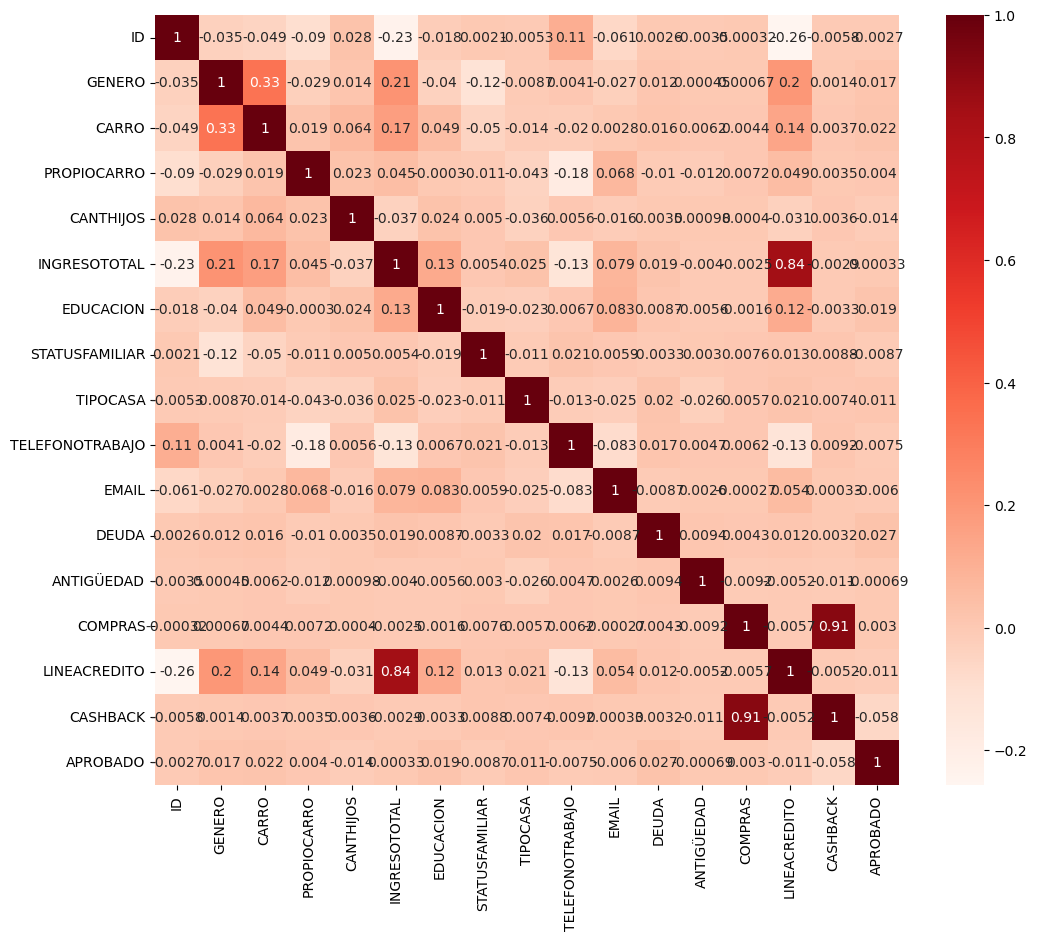

In [87]:
df_train=df_train.drop('Nombre',axis=1)
df_train=df_train.drop('TRABAJO', axis=1)
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [89]:
lr_model_aprob = LogisticRegression()
lr_model_aprob.fit(X_train, y_train_aprob)

LogisticRegression()

In [90]:
dt_model_cashback = DecisionTreeRegressor()
dt_model_cashback.fit(X_traincash, y_train_cashback)

DecisionTreeRegressor()

In [91]:
lr_pred_aprob = lr_model_aprob.predict(X_test)
lr_acc_aprob = accuracy_score(y_test_aprob, lr_pred_aprob)
lr_mse_aprob = mean_squared_error(y_test_aprob, lr_pred_aprob)

dt_pred_cashback = dt_model_cashback.predict(X_testcash)
dt_mse_cashback = mean_squared_error(y_test_cashback, dt_pred_cashback)
dt_pred_cashback_int = dt_pred_cashback.astype(int)

In [92]:
print("Precisión de regresión logística: {:.2f}%".format(lr_acc_aprob*100))

Precisión de regresión logística: 99.28%


In [93]:
mse_dt = mean_squared_error(y_test_cashback, dt_pred_cashback)
rmse_dt = mean_squared_error(y_test_cashback, dt_pred_cashback, squared=False)
print("Error de árbol de regresión para porcentaje de cashback: {:.2f}".format(dt_mse_cashback))
print('Árbol de regresión:')
#print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

Error de árbol de regresión para porcentaje de cashback: 0.36
Árbol de regresión:
MSE: 0.356531858035759
RMSE: 0.5971028873115244


In [94]:
df_test['APROBACION_PREDICHA'] = lr_pred_aprob # crear una nueva columna para las predicciones de aprobación
df_test['CASHBACK_PREDICHO'] = dt_pred_cashback_int # crear una nueva columna para las predicciones de cashback
df_test.drop(['APROBADO', 'CASHBACK'], axis=1, inplace=True)

In [95]:
df_test.to_excel("PREDICCIONES.xlsx", index=False)